In [1]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

In [2]:
def get_sine(t,F,A=1):
    return A*np.sin(2 * np.pi * F * t)

In [3]:
duration = 48e-6
F_main_real=440e3

fs = F_main_real*20

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3

t = np.linspace(0, duration, int(duration * fs))  

U = get_sine(t,F_main_real,2)+get_sine(t,F_noise_1)+get_sine(t,F_noise_2)+get_sine(t,F_noise_3)

In [4]:
R= 50
C= 500e-12

phase_real= md.get_phase_RC_real(F_main_real,R,C)
print(phase_real)

t,I= md.RC_transfer(t,U,R,C)

3.953712518086246


440131.02871480334


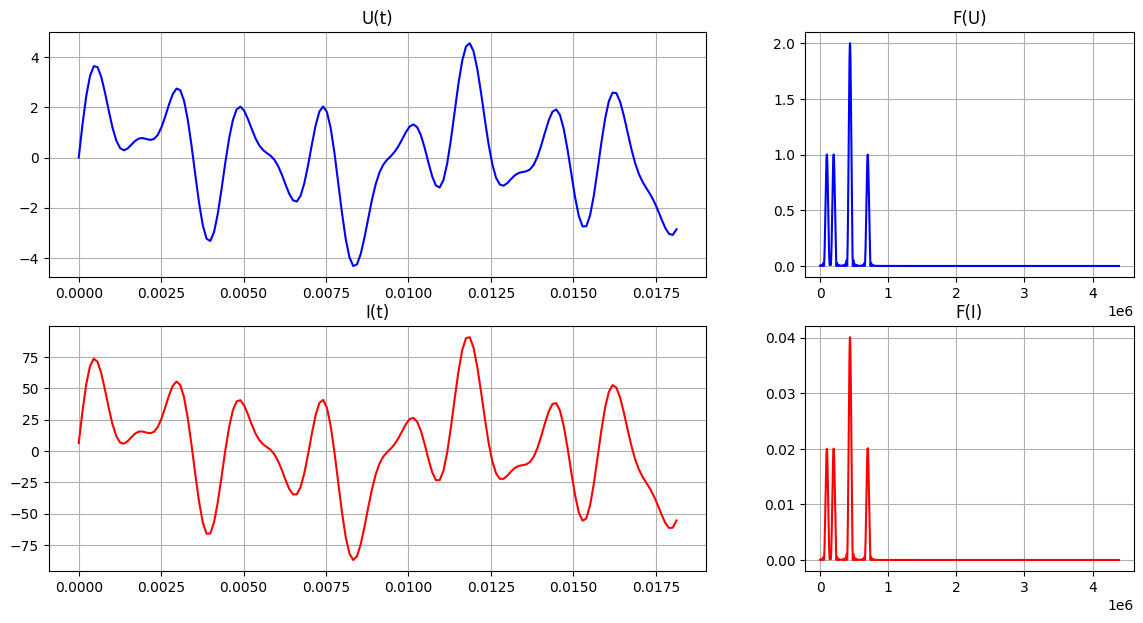

In [5]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=md.convert_to_counts(t,T)

window=T_counts*8

vw.show_I_U_2(t,I,U,0,window)

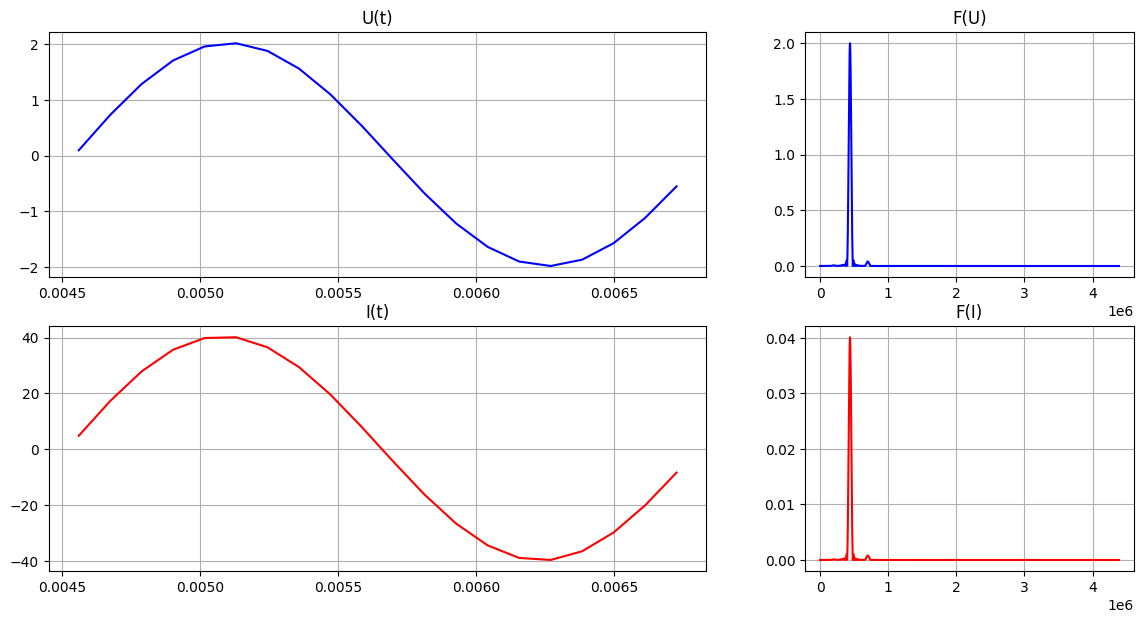

In [6]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,2)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,2)

vw.show_I_U_2(t_f,I_f, U_f,T_counts*2,T_counts*3)

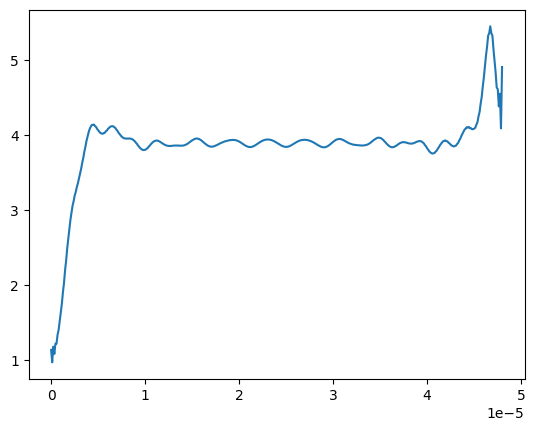

In [8]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f,U_f, I_f,fs)

plt.plot(time_hilbert, phase_hilbert)

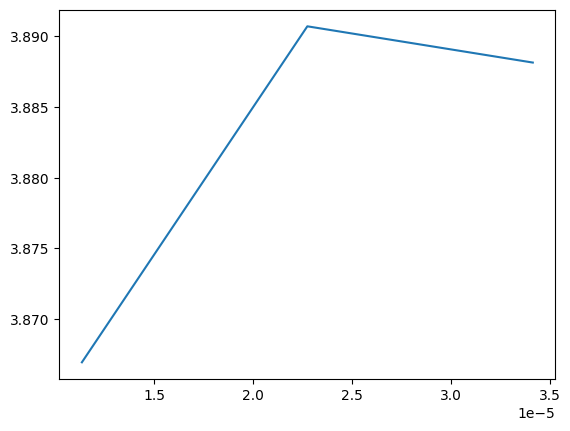

In [11]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f, U_f, I_f, F_peak_calc, n_periods=10, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

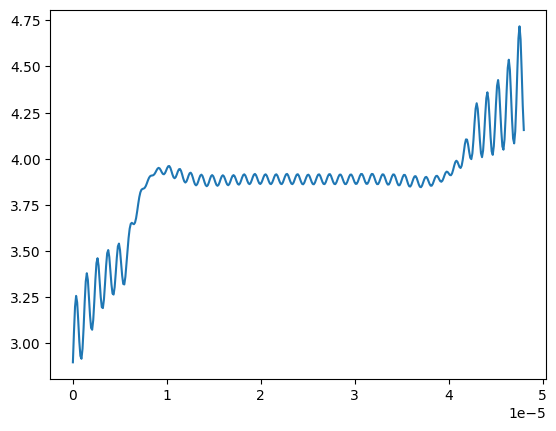

In [12]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f,I_f,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)

In [13]:
def mid_F_rel(sig):
    central_index=int(len(sig)/2)
    phase_central=sig[central_index]
    f_rel = F_peak_calc * np.cos(phase_central*0.0174533) / np.sin(phase_central*0.0174533)

    #phase_mean=np.mean(sig[central_index-100:central_index+100])
    #f_rel = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
    return f_rel

In [14]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

6366197.7236758135

In [15]:
print(mid_F_rel(phase_hilbert))
print(mid_F_rel(phase_FFT))
print(mid_F_rel(phase_lockin))

6473652.7741865255
6471568.8594517205
6443087.216067721
